In [2]:
from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# MNIST 손글씨 데이터 로드
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target
X_train, X_test, y_train, y_test=train_test_split(features,labels,test_size=0.2)

In [4]:
# 단일 모델 정확도 측정
# 의사결정 트리, kNN, SVM 모델 정확도 측정하기

dtree = tree.DecisionTreeClassifier(
    criterion="gini", max_depth=8, max_features=32, random_state=35
)

dtree = dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=299).fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

svm = SVC(C=0.1, gamma=0.003,
          probability=True, random_state=35).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

In [5]:
print("[Accuracy]")
print("D-tree : ", accuracy_score(y_test, dtree_predicted))
print("kNN : ", accuracy_score(y_test, knn_predicted))
print("SVM : ", accuracy_score(y_test, svm_predicted))

[Accuracy]
D-tree :  0.7833333333333333
kNN :  0.8222222222222222
SVM :  0.9111111111111111


In [6]:
svm_proba = svm.predict_proba(X_test)
print(svm_proba[0:2])

[[0.01159234 0.49363732 0.07787787 0.02988625 0.0267274  0.0705459
  0.01687466 0.03139262 0.18365973 0.05780591]
 [0.0074327  0.03297096 0.02957941 0.02027522 0.01997975 0.64764499
  0.0093664  0.0304198  0.13113918 0.07119159]]


In [7]:
# 하드 보팅
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)
], weights=[1, 1, 1], voting='hard').fit(X_train, y_train)
hard_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.9083333333333333

In [8]:
# 소프트 보팅
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)
], weights=[1, 1, 1], voting='soft').fit(X_train, y_train)
soft_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.8833333333333333

complete


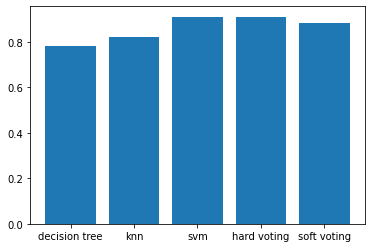

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(5)
plt.bar(x, height= [accuracy_score(y_test, dtree_predicted),
                    accuracy_score(y_test, knn_predicted),
                    accuracy_score(y_test, svm_predicted),
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted)])
plt.xticks(x, ['decision tree', 'knn', 'svm', 'hard voting', 'soft voting'])

print('complete')